# HOSPITAL DATA CLEANING,PREPROCESSING AND EDA

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv(r"C:\Users\Lenovo\Downloads\HealthCare_Dataset.csv")
print(data1)

     PatientID      PatientName  Age Gender BloodType     Diagnosis  \
0            1    David Johnson    3  Other        A+           Flu   
1            2              NaN   82  Other        A-      Covid-19   
2            3   William Taylor   56  Other        B+  Hypertension   
3            4    William Davis   36  Other       AB+      Covid-19   
4            5     Robert Davis   78   Male        B+           Flu   
..         ...              ...  ...    ...       ...           ...   
995        996      Linda Lopez    3   Male        B-      Covid-19   
996        997     David Martin    3  Other        A-  Hypertension   
997        998              NaN   70  Other        O+      Covid-19   
998        999  Joseph Martinez   37  Other        A-      Diabetes   
999       1000       John Moore   10   Male        O-        Asthma   

      Treatment        AdmissionDate        DischargeDate     TotalBill  \
0    Medication  2021-01-01 00:00:00  2021-01-02 00:00:00  14383.782350 

In [3]:
data2 = pd.read_csv(r"C:\Users\Lenovo\Downloads\HealthCare_Dataset2.csv")
print(data2)

     PatientID                     Hospital       DoctorName  RoomNumber  \
0            1           Riverside Hospital     Joseph Lopez         178   
1            2  Green Valley Medical Center      James Moore         368   
2            3           Riverside Hospital    Michael Lopez         260   
3            4           Cedar Sinai Clinic  Linda Rodriguez         228   
4            5           Riverside Hospital   Mary Hernandez         167   
..         ...                          ...              ...         ...   
995        996     Silver Oak Medical Plaza   Charles Martin         438   
996        997  Green Valley Medical Center     Linda Martin         255   
997        998           Cedar Sinai Clinic      Mary Martin         351   
998        999     Silver Oak Medical Plaza   James Martinez         142   
999       1000     Silver Oak Medical Plaza   Barbara Martin         260   

       DailyCost     TreatmentType  RecoveryRating  
0     359.006021           Surgery

## DATA PROFILING

In [4]:
data1.columns

Index(['PatientID', 'PatientName', 'Age', 'Gender', 'BloodType', 'Diagnosis',
       'Treatment', 'AdmissionDate', 'DischargeDate', 'TotalBill',
       'Full Prescription Details'],
      dtype='object')

In [5]:
data2.columns

Index(['PatientID', 'Hospital', 'DoctorName', 'RoomNumber', 'DailyCost',
       'TreatmentType', 'RecoveryRating'],
      dtype='object')

In [6]:
total_columns = data1.shape[1] , data2.shape[1]
total_columns

(11, 7)

In [7]:
total_rows = data1.shape[0] , data2.shape[0]
total_rows

(1000, 1000)

AS YOU CAN SEE DATA1 HAS 11 COLUMNS AND DATA2 HAS 7 BUT BOTH OF THEM CONSIST OF 1000 ROWS

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  1000 non-null   int64  
 1   PatientName                940 non-null    object 
 2   Age                        1000 non-null   int64  
 3   Gender                     1000 non-null   object 
 4   BloodType                  1000 non-null   object 
 5   Diagnosis                  1000 non-null   object 
 6   Treatment                  1000 non-null   object 
 7   AdmissionDate              1000 non-null   object 
 8   DischargeDate              1000 non-null   object 
 9   TotalBill                  940 non-null    float64
 10  Full Prescription Details  1000 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 86.1+ KB


In [9]:
data1.isnull().sum()

PatientID                     0
PatientName                  60
Age                           0
Gender                        0
BloodType                     0
Diagnosis                     0
Treatment                     0
AdmissionDate                 0
DischargeDate                 0
TotalBill                    60
Full Prescription Details     0
dtype: int64

In [10]:
miss= data1.isnull().sum()
miss

PatientID                     0
PatientName                  60
Age                           0
Gender                        0
BloodType                     0
Diagnosis                     0
Treatment                     0
AdmissionDate                 0
DischargeDate                 0
TotalBill                    60
Full Prescription Details     0
dtype: int64

In [11]:
miss_percentage = (data1.isnull().sum()/len(data1))* 100
miss_percentage

PatientID                    0.0
PatientName                  6.0
Age                          0.0
Gender                       0.0
BloodType                    0.0
Diagnosis                    0.0
Treatment                    0.0
AdmissionDate                0.0
DischargeDate                0.0
TotalBill                    6.0
Full Prescription Details    0.0
dtype: float64

PatientName has 6% missing value which can be treated as unknown as name is a critical column we just can't directly remove the blanks as rest oof the data are present also TotalBill got 6% null value which will be imputated in the later stage

In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientID       1000 non-null   int64  
 1   Hospital        922 non-null    object 
 2   DoctorName      1000 non-null   object 
 3   RoomNumber      1000 non-null   int64  
 4   DailyCost       1000 non-null   float64
 5   TreatmentType   1000 non-null   object 
 6   RecoveryRating  922 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [13]:
data2.isnull().sum()

PatientID          0
Hospital          78
DoctorName         0
RoomNumber         0
DailyCost          0
TreatmentType      0
RecoveryRating    78
dtype: int64

In [14]:
miss1= data2.isnull().sum()
miss1

PatientID          0
Hospital          78
DoctorName         0
RoomNumber         0
DailyCost          0
TreatmentType      0
RecoveryRating    78
dtype: int64

In [15]:
miss_percentage1 = (data2.isnull().sum()/len(data2))* 100
miss_percentage1

PatientID         0.0
Hospital          7.8
DoctorName        0.0
RoomNumber        0.0
DailyCost         0.0
TreatmentType     0.0
RecoveryRating    7.8
dtype: float64

Just Like in data1 data2 also got few null value about 7.8% in columns Hospital and RecoveryRating Hospital column blanks cannot be omitted as it is one of the primary column out there. So unknown will be filled in place of blanks. For RecoveryRating we are going to find the average of it and fill accordingly

<Axes: >

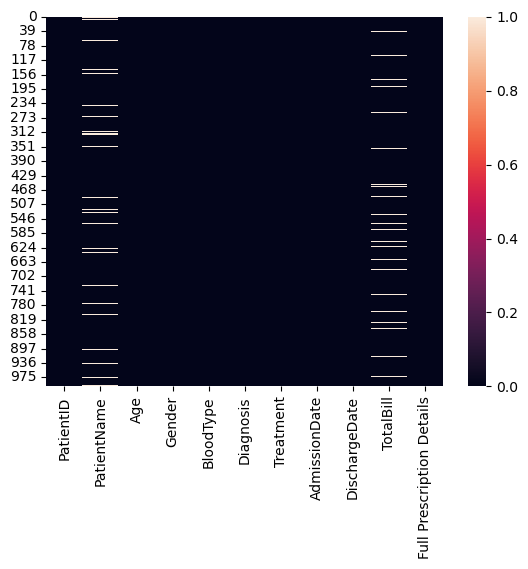

In [16]:
sns.heatmap(data1.isnull())  

<Axes: >

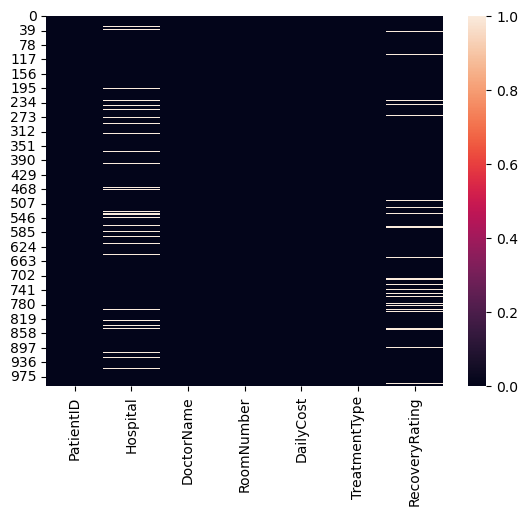

In [17]:
sns.heatmap(data2.isnull()) 

By this it is clearly been seen that the rows that is blank in hospital is not the same blanked rows in recoverrating likewise for patient name and total bill. So we need to deal with both individually and assess different technique for imputations

## DATA CLEANING AND PRE PROCESSING

In [18]:
data1.drop('Full Prescription Details', axis=1,inplace=True)

In [19]:
data1.columns

Index(['PatientID', 'PatientName', 'Age', 'Gender', 'BloodType', 'Diagnosis',
       'Treatment', 'AdmissionDate', 'DischargeDate', 'TotalBill'],
      dtype='object')

DROPPED the Description column to reduce the data redundancy as it was mainly a string column not so useful for analysis

In [20]:
data1.shape

(1000, 10)

In [21]:
data1['PatientName'] = data1['PatientName'].fillna('unknown')

In [22]:
data1['PatientName'].value_counts()

PatientName
unknown               60
Patricia Hernandez     7
Robert Rodriguez       7
Elizabeth Lopez        7
Jessica Rodriguez      7
                      ..
Sarah Jackson          1
James Thomas           1
Mary Gonzalez          1
Michael Moore          1
Joseph Martinez        1
Name: count, Length: 369, dtype: int64

MISSING Patient Name has been treated as per possible. It may not be the best way but still better than having a blank in the selection

In [23]:
data2.columns

Index(['PatientID', 'Hospital', 'DoctorName', 'RoomNumber', 'DailyCost',
       'TreatmentType', 'RecoveryRating'],
      dtype='object')

In [24]:
data2['Hospital'] = data2['Hospital'].fillna('n/a')

In [25]:
data2['Hospital'].value_counts()

Hospital
Green Valley Medical Center    207
Silver Oak Medical Plaza       185
Cedar Sinai Clinic             184
Maple Grove Health Facility    178
Riverside Hospital             168
n/a                             78
Name: count, dtype: int64

Dealing with duplicate rows Finding number of duplicate rows in the datasets then Droping the duplicate entries from the dataset.

In [26]:
data1[data1.duplicated()] 

,PatientID,PatientName,Age,Gender,BloodType,Diagnosis,Treatment,AdmissionDate,DischargeDate,TotalBill


In [27]:
data1.duplicated().sum()

0

In [28]:
data2[data2.duplicated()]

,PatientID,Hospital,DoctorName,RoomNumber,DailyCost,TreatmentType,RecoveryRating


In [29]:
data2.duplicated().sum()

0

NO DUPLICATES FOUND

In [30]:
data1.describe()

,PatientID,Age,TotalBill
count,1000.000000,1000.000000,940.000000
mean,500.500000,50.500000,10038.866970
std,288.819436,28.599859,5801.795268
min,1.000000,0.000000,200.928022
25%,250.750000,26.000000,4883.315196
50%,500.500000,51.500000,10152.880440
75%,750.250000,75.000000,14872.452167
max,1000.000000,99.000000,19979.201530


In [31]:
data1.groupby('Diagnosis')['TotalBill'].mean()

Diagnosis
Asthma           9779.536904
Covid-19        10581.567618
Diabetes         9469.119830
Flu              9771.535403
Hypertension    10615.723800
Name: TotalBill, dtype: float64

In [32]:
data1.groupby('Treatment')['TotalBill'].mean()

Treatment
Medication    10204.701944
Surgery        9865.776236
Therapy       10026.439343
Name: TotalBill, dtype: float64

In [33]:
data1['TotalBill'] = data1.groupby('Treatment')['TotalBill'].transform(lambda x: x.fillna(x.mean()))

Filled the blank value in total bill with their respective treatment mean.It distributed the mean evenly based on their treatment for which they have visited the hospital

<Axes: >

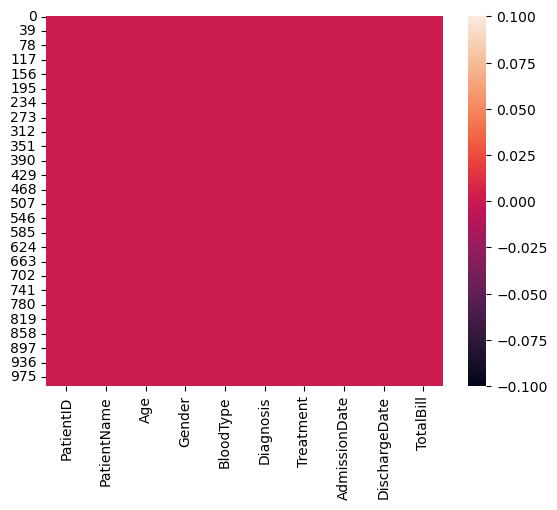

In [34]:
sns.heatmap(data1.isnull())

Data1 is cleaned and standardized

<Axes: >

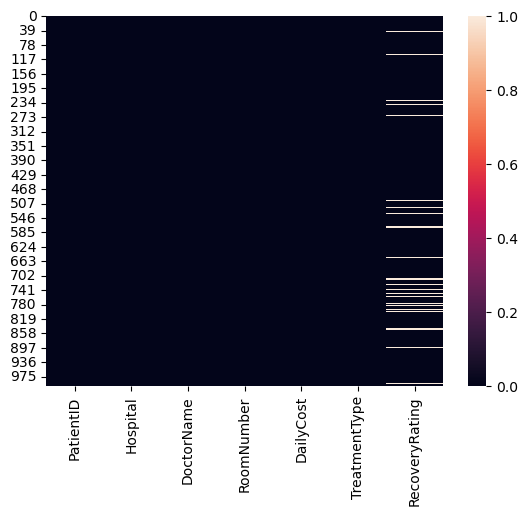

In [35]:
sns.heatmap(data2.isnull())

In [36]:
data2['RecoveryRating'].mean()

5.436008676789588

In [37]:
mean_recovery_rating = round(data2['RecoveryRating'].mean())
data2['RecoveryRating'] = data2['RecoveryRating'].fillna(mean_recovery_rating)

<Axes: >

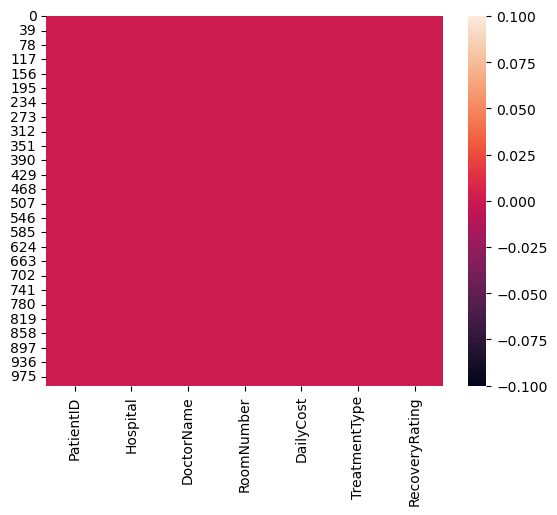

In [38]:
sns.heatmap(data2.isnull())

Data2 is cleared and standardized

In [39]:
data1.to_csv('hospital1_clean.csv')

In [40]:
data2.to_csv('hospital2_clean.csv')

## EDA

In [41]:
data1.dtypes

PatientID          int64
PatientName       object
Age                int64
Gender            object
BloodType         object
Diagnosis         object
Treatment         object
AdmissionDate     object
DischargeDate     object
TotalBill        float64
dtype: object

In [42]:
data1['AdmissionDate'] = pd.to_datetime(data1['AdmissionDate'])
data1['DischargeDate'] = pd.to_datetime(data1['DischargeDate'])

In [43]:
data2.dtypes

PatientID           int64
Hospital           object
DoctorName         object
RoomNumber          int64
DailyCost         float64
TreatmentType      object
RecoveryRating    float64
dtype: object

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21484\1666141477.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=data1,palette='Set2')


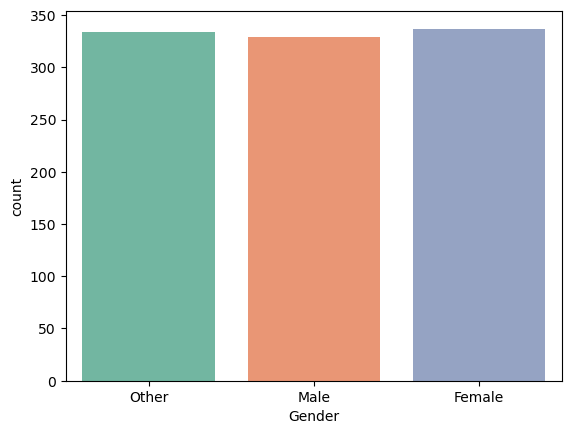

In [44]:
sns.countplot(x='Gender',data=data1,palette='Set2')
plt.show()

GENDER IS ALMOST SAME FOR ALL TYPE

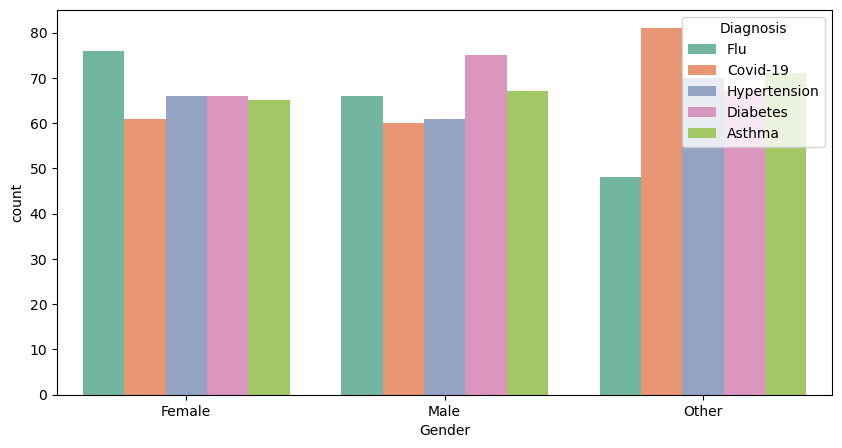

In [45]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender',hue='Diagnosis',data=data1,palette='Set2')
plt.xticks([0,1,2],['Female','Male','Other'])
plt.show()

INSIGHTS:-FOUND SOME INTERESTING INSIGHTS WHICH WILL BE FURTHER DISCUSSED IN THE LATER PART OF THE PROJECT

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21484\1951830225.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Age'],bins=20)


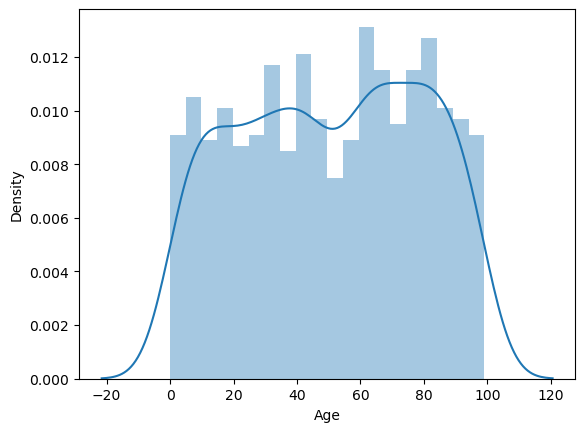

In [46]:
sns.distplot(data1['Age'],bins=20)
plt.show()

DATA HAS NO OUTLIER IN THE AGE

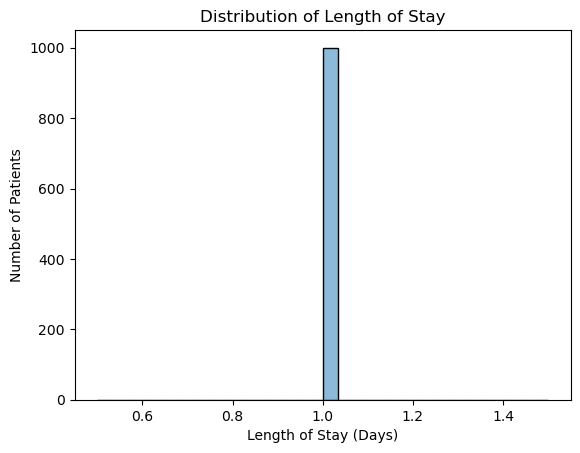

In [47]:
data1['LengthOfStay'] = (data1['DischargeDate'] - data1['AdmissionDate']).dt.days
sns.histplot(data1['LengthOfStay'], bins=30, kde=True)
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Number of Patients')
plt.show()

SEEMS THAT THIS DATASET IS A MADEUP DATASET IT IS SHOWING EVERY 1000 PATIENT STAYED ONLY FOR 1 DAY THIS CLARIFIES IT IS FICTIONAL

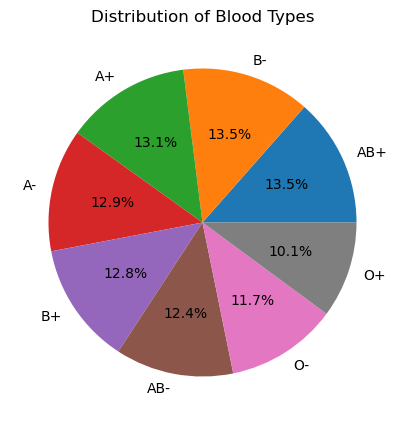

In [48]:
blood_type_counts = data1['BloodType'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(blood_type_counts, labels=blood_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Blood Types')
plt.show()

NO SUCH SIGNIFICANT INSIGHTS FOUND

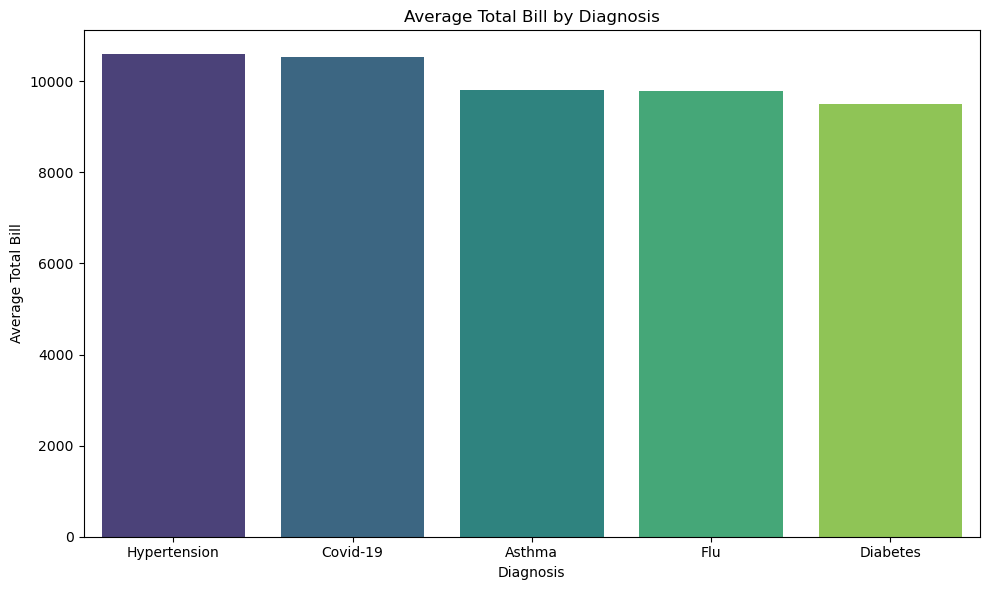

In [49]:
avg_bill_by_diagnosis = data1.groupby('Diagnosis')['TotalBill'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_bill_by_diagnosis.index, y=avg_bill_by_diagnosis.values, hue=avg_bill_by_diagnosis.index, palette='viridis', legend=False)
plt.title('Average Total Bill by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Average Total Bill')
plt.tight_layout()
plt.show()

INSIGHTS:- HYPERTENSION AND COVID-19 GENERATE A LOT OF REVENUE

In [51]:
data2.dtypes

PatientID           int64
Hospital           object
DoctorName         object
RoomNumber          int64
DailyCost         float64
TreatmentType      object
RecoveryRating    float64
dtype: object

In [52]:
data2.head(3)

,PatientID,Hospital,DoctorName,RoomNumber,DailyCost,TreatmentType,RecoveryRating
0,1,Riverside Hospital,Joseph Lopez,178,359.006021,Surgery,10.0
1,2,Green Valley Medical Center,James Moore,368,933.915694,Surgery,4.0
2,3,Riverside Hospital,Michael Lopez,260,1272.088112,Counseling,5.0


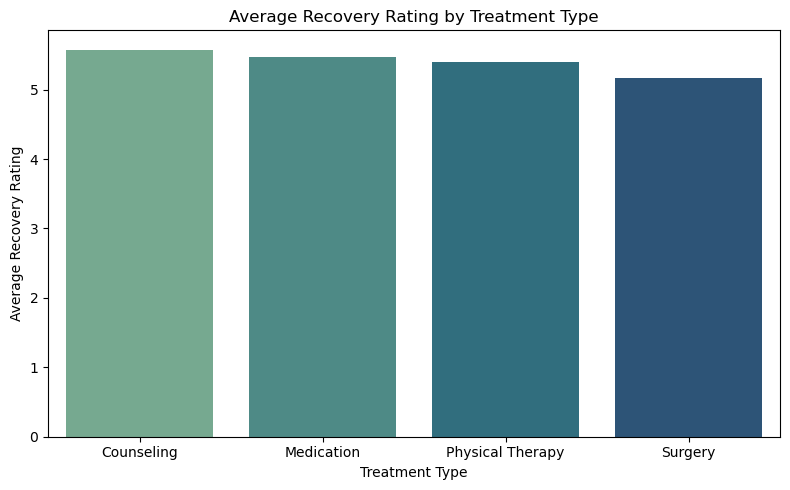

In [53]:
avg_recovery_by_treatment = data2.groupby('TreatmentType')['RecoveryRating'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_recovery_by_treatment.index, y=avg_recovery_by_treatment.values, hue=avg_recovery_by_treatment.index, palette='crest', legend=False)
plt.title('Average Recovery Rating by Treatment Type')
plt.xlabel('Treatment Type')
plt.ylabel('Average Recovery Rating')
plt.tight_layout()
plt.show()


INSIGHTS:- COUNSELING HAS THE BEST AVERAGE RATING COMPARED TO THE REST

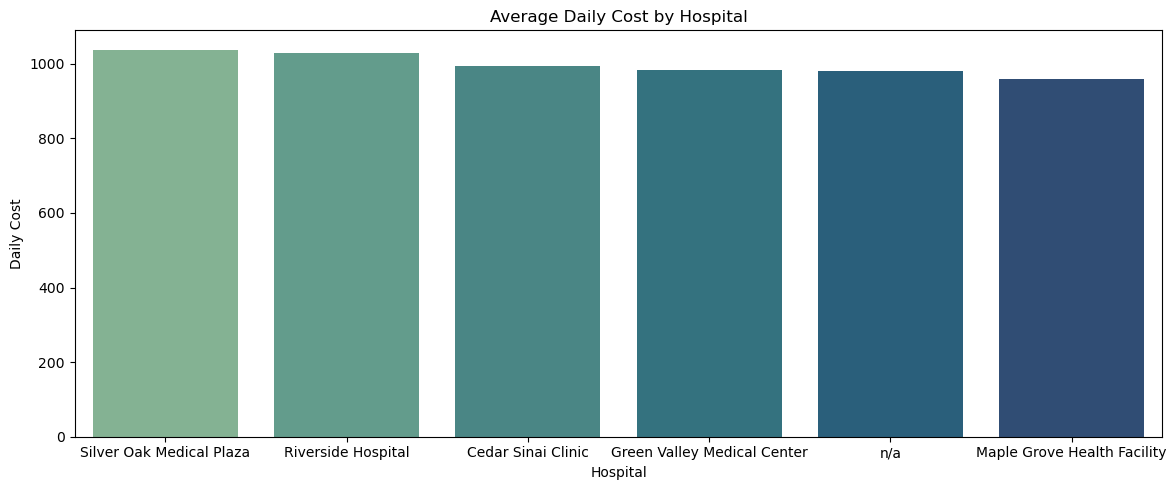

In [54]:
avg_dailycost_by_hospital = data2.groupby('Hospital')['DailyCost'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
sns.barplot(x=avg_dailycost_by_hospital.index, y=avg_dailycost_by_hospital.values, hue=avg_dailycost_by_hospital.index, palette='crest', legend=False)
plt.title('Average Daily Cost by Hospital')
plt.xlabel('Hospital')
plt.ylabel('Daily Cost')
plt.tight_layout()
plt.show()

INSIGHTS:- SILVER OAK MEDICAL PLAZA IS THE MOST EXPENSIVE WHEN IT COMES TO DAILY BILL